https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [5]:
!wget --no-check-certificate https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv

--2021-05-30 21:21:23--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conectado.
AVISO: não foi possível verificar o certificado de raw.githubusercontent.com, emitido por “C=BR,ST=DF,L=Brasil,OU=REGBSA,O=SERPRO,CN=Filtro de conteudo”:
  Foi encontrado um certificado auto-assinado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 76466 (75K) [text/plain]
Salvando em: “ionosphere.csv”

ionosphere.csv      100%[===================>]  74,67K  --.-KB/s    em 0,06s   

2021-05-30 21:21:23 (1,22 MB/s) - “ionosphere.csv” salvo [76466/76466]



In [28]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('ionosphere.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,
       1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,
       -0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,
       -0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,
       -0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.931
Predicted: 0.979


In [32]:
X_train[:2]

array([[ 1.     ,  0.     ,  1.     , -0.01081,  1.     , -0.02703,
         1.     , -0.06486,  0.95135, -0.01622,  0.98919, -0.03243,
         0.98919,  0.08649,  1.     , -0.06486,  0.95135,  0.09189,
         0.97838, -0.00541,  1.     ,  0.06486,  1.     ,  0.04324,
         0.97838,  0.09189,  0.98556,  0.01251,  1.     , -0.03243,
         1.     ,  0.02703,  1.     , -0.07027],
       [ 1.     ,  0.     ,  0.03852,  0.02568,  0.00428,  0.     ,
         0.01997, -0.01997,  0.0214 , -0.04993, -0.0485 , -0.01284,
         0.01427, -0.02282,  0.     , -0.03281, -0.04708, -0.02853,
        -0.01712,  0.03566,  0.0214 ,  0.00428,  0.05136, -0.02282,
         0.05136,  0.01854,  0.03994,  0.01569,  0.01997,  0.00713,
        -0.02568, -0.01854, -0.01427,  0.01997]], dtype=float32)

In [33]:
y_train[:2]

array([1, 0])

In [8]:
!wget --no-check-certificate https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

--2021-05-30 21:26:49--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conectado.
AVISO: não foi possível verificar o certificado de raw.githubusercontent.com, emitido por “C=BR,ST=DF,L=Brasil,OU=REGBSA,O=SERPRO,CN=Filtro de conteudo”:
  Foi encontrado um certificado auto-assinado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 4549 (4,4K) [text/plain]
Salvando em: “iris.csv”

iris.csv            100%[===================>]   4,44K  --.-KB/s    em 0s      

2021-05-30 21:26:50 (10,7 MB/s) - “iris.csv” salvo [4549/4549]



In [9]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('iris.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.480
Predicted: [[0.33404884 0.38389507 0.28205612]] (class=1)


In [11]:
!wget --no-check-certificate https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv

--2021-05-30 21:29:40--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conectado.
AVISO: não foi possível verificar o certificado de raw.githubusercontent.com, emitido por “C=BR,ST=DF,L=Brasil,OU=REGBSA,O=SERPRO,CN=Filtro de conteudo”:
  Foi encontrado um certificado auto-assinado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 41295 (40K) [text/plain]
Salvando em: “housing.csv”

housing.csv         100%[===================>]  40,33K  --.-KB/s    em 0,02s   

2021-05-30 21:29:41 (2,31 MB/s) - “housing.csv” salvo [41295/41295]



In [12]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('housing.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 96.904, RMSE: 9.844
Predicted: 24.063


Matplotlib is building the font cache; this may take a moment.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


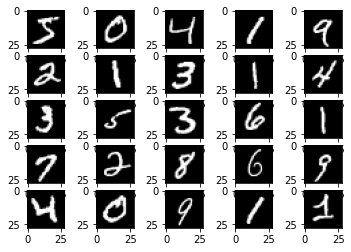

In [13]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [14]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.988
Predicted: class=5


In [16]:
!wget --no-check-certificate https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

--2021-05-30 21:36:27--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conectado.
AVISO: não foi possível verificar o certificado de raw.githubusercontent.com, emitido por “C=BR,ST=DF,L=Brasil,OU=REGBSA,O=SERPRO,CN=Filtro de conteudo”:
  Foi encontrado um certificado auto-assinado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 1834 (1,8K) [text/plain]
Salvando em: “monthly-car-sales.csv”

monthly-car-sales.c 100%[===================>]   1,79K  --.-KB/s    em 0s      

2021-05-30 21:36:27 (13,5 MB/s) - “monthly-car-sales.csv” salvo [1834/1834]



In [17]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

# load the dataset
df = read_csv('monthly-car-sales.csv', header=0, index_col=0, squeeze=True)

# retrieve the values
values = df.values.astype('float32')

# specify the window size
n_steps = 5

# split into samples
X, y = split_sequence(values, n_steps)

# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))

# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Epoch 1/350
3/3 - 1s - loss: 6305607680.0000 - mae: 76603.6484 - val_loss: 5700920832.0000 - val_mae: 72779.7344
Epoch 2/350
3/3 - 0s - loss: 2744383488.0000 - mae: 50328.2539 - val_loss: 2102439296.0000 - val_mae: 44399.5000
Epoch 3/350
3/3 - 0s - loss: 1103567488.0000 - mae: 31248.8730 - val_loss: 428472224.0000 - val_mae: 19097.8613
Epoch 4/350
3/3 - 0s - loss: 209962128.0000 - mae: 12258.3369 - val_loss: 51083116.0000 - val_mae: 5519.1621
Epoch 5/350
3/3 - 0s - loss: 73914968.0000 - mae: 7035.0830 - val_loss: 254723120.0000 - val_mae: 13773.7432
Epoch 6/350
3/3 - 0s - loss: 240412240.0000 - mae: 13405.6348 - val_loss: 496695136.0000 - val_mae: 20861.5898
Epoch 7/350
3/3 - 0s - loss: 377532384.0000 - mae: 17685.8574 - val_loss: 522915616.0000 - val_mae: 21147.7676
Epoch 8/350
3/3 - 0s - loss: 333706656.0000 - mae: 16691.0020 - val_loss: 340963040.0000 - val_mae: 16955.3301
Epoch 9/350
3/3 - 0s - loss: 199799328.0000 - mae: 12476.2793 - val_loss: 138

Epoch 77/350
3/3 - 0s - loss: 11511499.0000 - mae: 2728.8857 - val_loss: 17909510.0000 - val_mae: 3537.0586
Epoch 78/350
3/3 - 0s - loss: 11383447.0000 - mae: 2698.7234 - val_loss: 17499874.0000 - val_mae: 3577.6609
Epoch 79/350
3/3 - 0s - loss: 10940881.0000 - mae: 2669.4285 - val_loss: 17360934.0000 - val_mae: 3743.4338
Epoch 80/350
3/3 - 0s - loss: 10933700.0000 - mae: 2681.5559 - val_loss: 17966014.0000 - val_mae: 3947.3264
Epoch 81/350
3/3 - 0s - loss: 10942835.0000 - mae: 2678.1780 - val_loss: 17239410.0000 - val_mae: 3807.4678
Epoch 82/350
3/3 - 0s - loss: 10932069.0000 - mae: 2660.1750 - val_loss: 16629872.0000 - val_mae: 3503.6003
Epoch 83/350
3/3 - 0s - loss: 10567793.0000 - mae: 2605.8757 - val_loss: 16498679.0000 - val_mae: 3496.2336
Epoch 84/350
3/3 - 0s - loss: 10478416.0000 - mae: 2596.0242 - val_loss: 16405243.0000 - val_mae: 3560.4324
Epoch 85/350
3/3 - 0s - loss: 10535095.0000 - mae: 2594.5178 - val_loss: 16696432.0000 - val_mae: 3722.8057
Epoch 86/350
3/3 - 0s - loss

Epoch 153/350
3/3 - 0s - loss: 8672556.0000 - mae: 2358.4875 - val_loss: 15744048.0000 - val_mae: 3274.6289
Epoch 154/350
3/3 - 0s - loss: 8506383.0000 - mae: 2320.0525 - val_loss: 15894280.0000 - val_mae: 3247.5146
Epoch 155/350
3/3 - 0s - loss: 8424198.0000 - mae: 2296.6089 - val_loss: 15776047.0000 - val_mae: 3263.9148
Epoch 156/350
3/3 - 0s - loss: 8948723.0000 - mae: 2358.4231 - val_loss: 16003548.0000 - val_mae: 3215.4666
Epoch 157/350
3/3 - 0s - loss: 9675565.0000 - mae: 2464.8018 - val_loss: 15557528.0000 - val_mae: 3145.1067
Epoch 158/350
3/3 - 0s - loss: 9437275.0000 - mae: 2471.0627 - val_loss: 20185358.0000 - val_mae: 3638.8938
Epoch 159/350
3/3 - 0s - loss: 11742667.0000 - mae: 2832.8245 - val_loss: 16933006.0000 - val_mae: 3302.7615
Epoch 160/350
3/3 - 0s - loss: 10987814.0000 - mae: 2745.6003 - val_loss: 13350232.0000 - val_mae: 2986.3035
Epoch 161/350
3/3 - 0s - loss: 10299896.0000 - mae: 2599.3030 - val_loss: 13308491.0000 - val_mae: 3282.0110
Epoch 162/350
3/3 - 0s - 

Epoch 229/350
3/3 - 0s - loss: 8507944.0000 - mae: 2331.5645 - val_loss: 13310801.0000 - val_mae: 3028.5281
Epoch 230/350
3/3 - 0s - loss: 8506878.0000 - mae: 2333.0730 - val_loss: 13286593.0000 - val_mae: 3028.0325
Epoch 231/350
3/3 - 0s - loss: 8532171.0000 - mae: 2342.3875 - val_loss: 13329280.0000 - val_mae: 3019.7961
Epoch 232/350
3/3 - 0s - loss: 8488532.0000 - mae: 2329.8884 - val_loss: 13024505.0000 - val_mae: 3037.3301
Epoch 233/350
3/3 - 0s - loss: 8580702.0000 - mae: 2335.4119 - val_loss: 13369027.0000 - val_mae: 3026.3652
Epoch 234/350
3/3 - 0s - loss: 8603946.0000 - mae: 2339.4492 - val_loss: 13108043.0000 - val_mae: 3021.7102
Epoch 235/350
3/3 - 0s - loss: 8437384.0000 - mae: 2323.4348 - val_loss: 13647292.0000 - val_mae: 3061.7947
Epoch 236/350
3/3 - 0s - loss: 8453878.0000 - mae: 2332.3621 - val_loss: 13255664.0000 - val_mae: 3025.2727
Epoch 237/350
3/3 - 0s - loss: 8405110.0000 - mae: 2323.9922 - val_loss: 13117933.0000 - val_mae: 3023.9314
Epoch 238/350
3/3 - 0s - los

Epoch 305/350
3/3 - 0s - loss: 8815705.0000 - mae: 2409.8047 - val_loss: 14291264.0000 - val_mae: 3093.0525
Epoch 306/350
3/3 - 0s - loss: 8612019.0000 - mae: 2366.6284 - val_loss: 13286008.0000 - val_mae: 3005.5557
Epoch 307/350
3/3 - 0s - loss: 8695601.0000 - mae: 2352.1428 - val_loss: 13667031.0000 - val_mae: 3041.5808
Epoch 308/350
3/3 - 0s - loss: 8880990.0000 - mae: 2408.0574 - val_loss: 15761221.0000 - val_mae: 3239.6514
Epoch 309/350
3/3 - 0s - loss: 8857893.0000 - mae: 2399.2847 - val_loss: 13415784.0000 - val_mae: 3033.2058
Epoch 310/350
3/3 - 0s - loss: 8467271.0000 - mae: 2330.9312 - val_loss: 13533307.0000 - val_mae: 3035.0930
Epoch 311/350
3/3 - 0s - loss: 8328652.0000 - mae: 2330.3760 - val_loss: 14233797.0000 - val_mae: 3103.2000
Epoch 312/350
3/3 - 0s - loss: 8416326.0000 - mae: 2338.1628 - val_loss: 14219768.0000 - val_mae: 3104.1375
Epoch 313/350
3/3 - 0s - loss: 8294609.5000 - mae: 2327.7427 - val_loss: 13296115.0000 - val_mae: 3021.2776
Epoch 314/350
3/3 - 0s - los

In [18]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [23]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
plot_model(model, 'model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


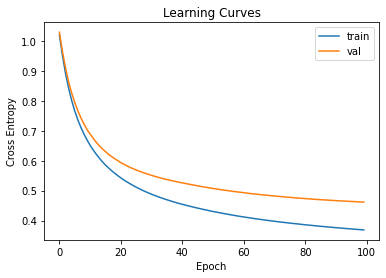

In [24]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [26]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# save model to file
model.save('model.h5')

In [27]:
# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# load the model from file
model = load_model('model.h5')

# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

Predicted: 0.887
